In [1]:
#Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


__Pandas is defined as an open-source library that provides high-performance data manipulation in Python. It is built on top of the NumPy package, which means Numpy is required for operating the Pandas. The name of Pandas is derived from the word Panel Data, which means an Econometrics from Multidimensional data.__

__Before Pandas, Python was capable for data preparation, but it only provided limited support for data analysis. So, Pandas came into the picture and enhanced the capabilities of data analysis. It can perform five significant steps required for processing and analysis of data irrespective of the origin of the data, i.e., load, manipulate, prepare, model, and analyze.__

                                                    ***

__NumPy is mostly written in C language, and it is an extension module of Python. It is defined as a Python package used for performing the various numerical computations and processing of the multidimensional and single-dimensional array elements. The calculations using Numpy arrays are faster than the normal Python array.__

In [2]:
#Import Bengaluru Datatset

df1=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
#Dataset Records and Features

df1.shape

(13320, 9)

In [4]:
# Pandas head() method is used to return top n rows of a data frame.

df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.head(13320)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
# Grouping area type

df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# Drop Unnecessary Features Like 'area_type','society','availability'

df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
#total null value

df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
# drop all null values

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
# Updated Records and Features 

df3.shape

(12710, 6)

__Lambda functions are defined using the keyword lambda. They can have any number of arguments but only one expression. A lambda function cannot contain any statements, and it returns a function object which can be assigned to any variable. They are generally used for one-line expressions.Regular functions are created using the def keyword. The split( ) method splits a string into a list.They can have any number of arguments and any number of expressions. They can contain any statements and are generally used for large blocks of code.__

In [11]:
# Adding The Bhk Catgorical Features 

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [12]:
# Unique Values Of 'total_Sqft'

df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
#Define Function Checking Float Values For 'total_sqft'  

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
# Prints Ranges of that values which is not float

df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [15]:
#This Function Convert sqft to Number 

def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
#Average Value

convert_sqft_to_num('2100 - 2850')

2475.0

In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [18]:
df4.loc[15]

location      Mysore Road
size                2 BHK
total_sqft           1175
bath                    2
balcony                 2
price                73.5
bhk                     2
Name: 15, dtype: object

In [19]:
# add price_per_sqft from price/total_sqft

df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
len(df5.location.unique())

1265

__The strip() method returns a copy of the string by removing both the leading and the trailing characters (based on the string argument passed). The strip() method removes characters from both left and right based on the argument (a string specifying the set of characters to be removed).__

In [21]:
df5.location=df5.location.apply(lambda x: x.strip())

location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1017

In [23]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

In [24]:
len(df5.location.unique())

1254

In [25]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

238

In [26]:
df5.head(15)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [27]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [28]:
df5.shape

(12710, 8)

In [29]:
# negate this condition "total_sqft/df5.bhk<300" value

df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [30]:
df6.shape

(12055, 8)

In [31]:
# describe() method gives some specific statestics
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
# This function calculating mean and standard deviation

def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(9848, 8)

__A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.__

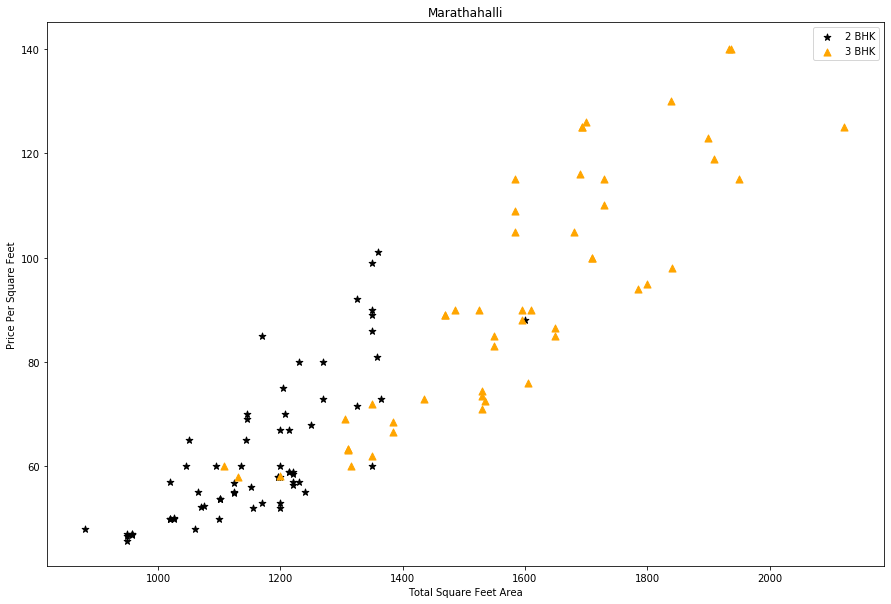

In [33]:
# this  function take location and dataframe as a input

def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='*',color='black',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='^',color='orange',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Marathahalli")

In [34]:
# Now we can remove some bhk outliers

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7025, 8)

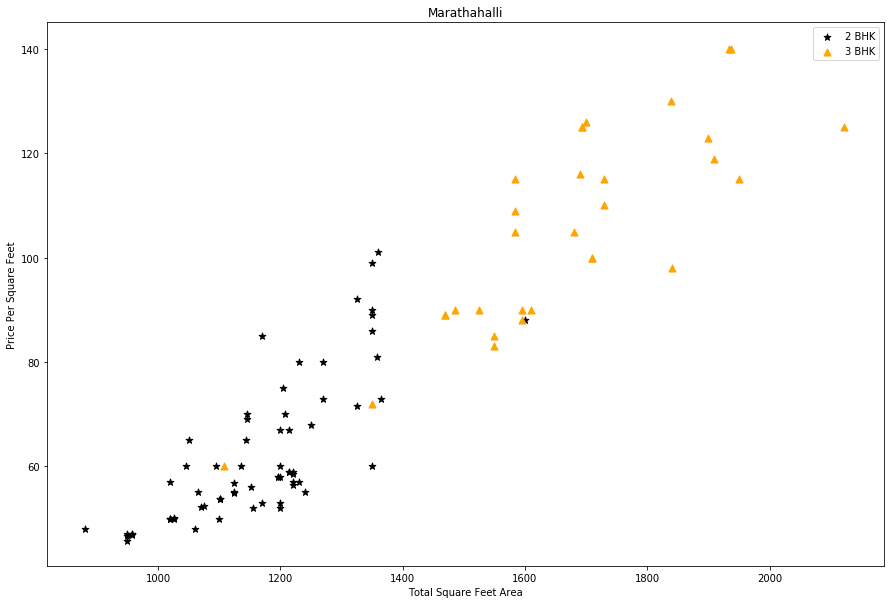

In [35]:
plot_scatter_chart(df8,"Marathahalli")

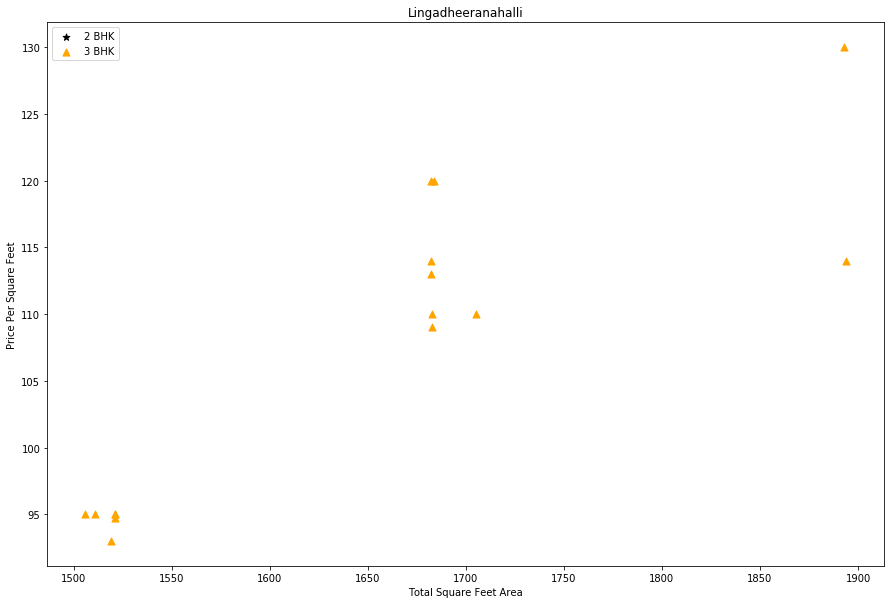

In [36]:
plot_scatter_chart(df8,"Lingadheeranahalli")

__Matplotlib comes with a wide variety of plots. Plots helps to understand trends, patterns, and to make correlations. They’re typically instruments for reasoning about quantitative information. Some of the sample plots are covered here.__

Text(0, 0.5, 'Count')

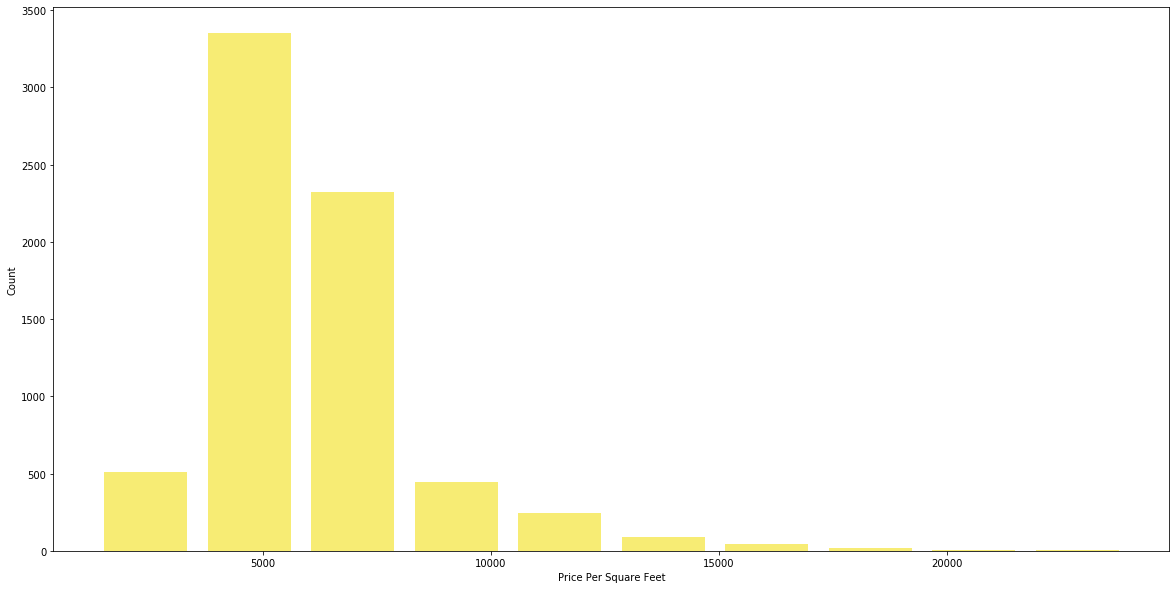

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8,color='#f7ec74')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
#unique value of bath

df8.bath.unique()
df8.shape

(7025, 8)

In [39]:
# value of bath which is greater than 10

df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

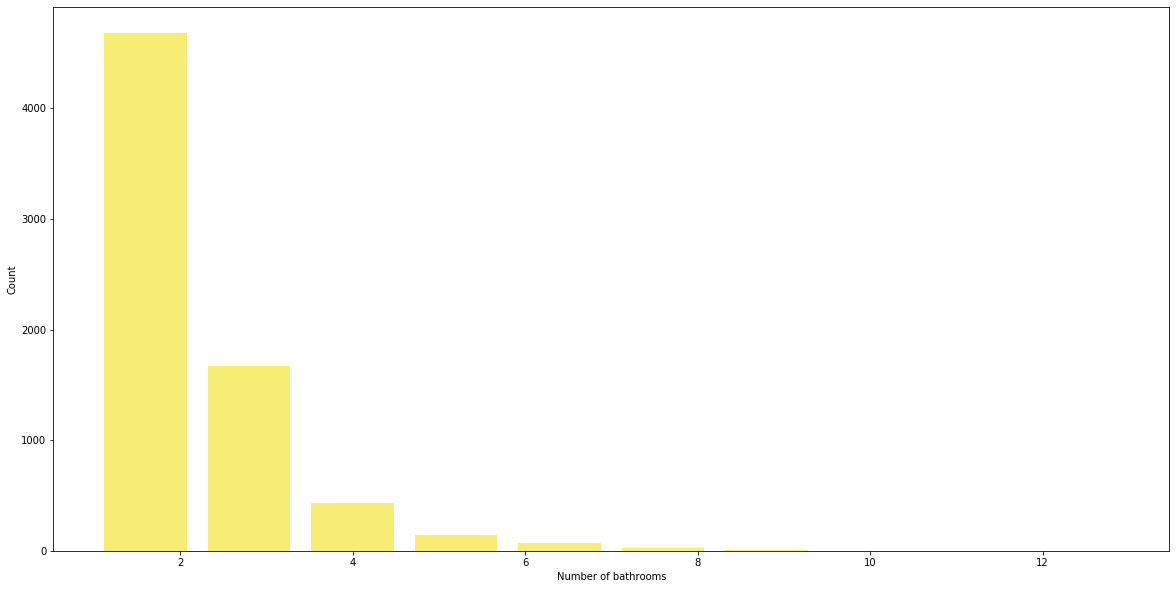

In [40]:
# The hist() function in pyplot module of matplotlib library is used to plot a histogram. 

plt.hist(df8.bath,rwidth=0.8,color='#f7ec74')
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [42]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6958, 8)

In [43]:
df9.head(15)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,2.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667
9,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525
10,1st Phase JP Nagar,3 BHK,2059.0,3.0,2.0,225.0,3,10927.634774


In [44]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


__A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something . Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. Numeric variables can also be dummy coded to explore nonlinear effects. Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables.__

In [45]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12.shape

(6958, 242)

In [49]:
# dropping the price

X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X.shape

(6958, 241)

In [51]:
y = df12.price
y.head(3)


0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [52]:
len(y)

6958

In [53]:
y.shape

(6958,)

__The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the mode *** train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets.__

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

__1] Supervised Learning:__

__In supervised learning the data is in labeled and the aim of this methodology is for the rule to be able to “learn” by comparison its actual output with the“taught” outputs to search out errors, and modify the model consequently. supervised learning souses patterns to predict label values on extra unlabeled knowledge. Here the example of supervised machine learning algorithms is: Linear regression for regression issues. Random forest for classification and regression issues. Support vector machines for classification issues.__

                                                    ***

__2]Unsupervised Learning:__

__Unsupervised learning may be a style of machine learning algorithmic program wont to draw inferences from datasets consisting of computer file while not labelled responses. The most common unsupervised learning methodology is cluster analysis, that is employed for explorative information analysis to seek out hidden patterns or grouping in information.__

__Linear Regression: Linear regression is one amongst the simplest and most well liked Machine Learning algorithms. it'sa method that's used for prognosticative analysis.simple regression makes predictions for continuous/real or numeric variables like sales,salary, age, product worth, etc.Linear regression formula shows a linear relationship between a dependent (y) and one oradditional freelance (y) variables, therefore known as as simple regression. Since simple regression shows the linear relationship, which implies it finds however the worth of the variable quantity is dynamical in keeping with the worth of the variable.__

In [55]:
#Accuracy Using Linear Regression

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8584587986234865

In [56]:
def predict_price(location,sqft,bath,bhk,balcony):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [57]:
predict_price('1st Phase JP Nagar',1000, 3, 3,1)

93.61721314598444

In [58]:
df12.tail(50)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9733,1650.0,3.0,2.0,140.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9736,2559.0,1.0,1.0,55.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9737,720.0,1.0,2.0,28.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,1100.0,2.0,1.0,90.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9741,600.0,1.0,1.0,22.80,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9742,540.0,1.0,2.0,24.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9749,1200.0,4.0,1.0,85.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9752,2400.0,3.0,2.0,185.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9753,1432.0,3.0,2.0,79.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9754,1500.0,3.0,3.0,90.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
predict_price('Yelenahalli',1000, 2, 2,0)

28.71315047260932

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8584587986234865